Victor CHAU & Tahar AMAIRI
# IFT 870 - Forage de données
## TP4 : Fonctions descriptives

### Sommaire

# TODO

## Importation des données

In [37]:
# import libs
from matplotlib import pyplot as plt
from IPython.display import display
from Bio import pairwise2
import seaborn as sns
import pandas as pd
import numpy as np

# read CSV
df = pd.read_csv('TP4_data.csv')

# print the df
df.head()

,id,sequence
0,U10409.1/2025-2178,AACUUUCAGCAACGGAUCUCUUGGUUCUCGCAUCGAUGAAGAACGC...
1,AF223066.1/5881-6030,GACUCUCGGCAACGGAUAUCUCGGCUCUCGCAUCGAUGAAGAACGU...
2,Y07976.1/124-271,CACUUUCAGCAACGGAUGUCUCGGUUCCCAUAACGAUGAAGAACGC...
3,X03680.1/3159-3308,UAGCUUCAGCGAUGGAUCGGUUGCAUCGAGUAUCGAUGAAGAACGC...
4,X90410.1/15-165,AACUUUCAGCAAUGGAUCUCUUGGCUCUUGCAUCGAUGAAGAACGC...


## 1. Segmentation des données suivant la longueur des séquences
### a) Histogramme

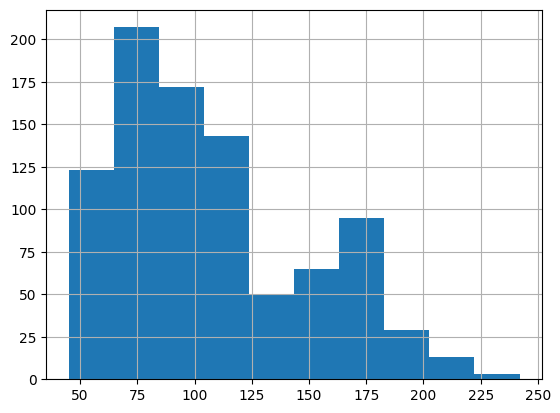

In [38]:
# plot histogram
df['sequence'].str.len().hist();

### b) Partitionnement 
TODO

In [39]:
# first group
mask = (df['sequence'].str.len() < 100)
df1 = df.loc[mask,:]

# second group
mask = (df['sequence'].str.len() >= 100) & (df['sequence'].str.len() < 150)
df2 = df.loc[mask,:]

# third group
mask = (df['sequence'].str.len() >= 150) & (df['sequence'].str.len() < 200)
df3 = df.loc[mask,:]

# fourth group
mask = (df['sequence'].str.len() >= 200)
df4 = df.loc[mask,:]

## 2. Partitionnement à partir d’une représentation vectorielle des données
### a) Représentation vectorielle

In [40]:
# transform a sequence into a k-mer vectorial representation using a list of k-mer
def SeqToKMerVec(seq, k_mer):
    # data frame containing the results
    df = pd.DataFrame(0, index=np.arange(len(seq)), columns=["{}-mer".format(k) for k in k_mer])

    # iterate over each k-mer value 
    for k in k_mer:
        # transform into a k-mer vectorial representation
        df['{}-mer'.format(k)] = seq.apply(lambda s: [s[i:i+k] for i in range(len(s)-k+1)]).values

    # return the df
    return df

# first group
dfKMerVec1 = SeqToKMerVec(df1['sequence'], [2,3,4])

# print the result
dfKMerVec1.head()

,2-mer,3-mer,4-mer
0,"[GU, UG, GU, UG, GU, UU, UU, UA, AU, UG, GA, A...","[GUG, UGU, GUG, UGU, GUU, UUU, UUA, UAU, AUG, ...","[GUGU, UGUG, GUGU, UGUU, GUUU, UUUA, UUAU, UAU..."
1,"[CU, UC, CU, UG, GU, UU, UA, AA, AU, UG, GA, A...","[CUC, UCU, CUG, UGU, GUU, UUA, UAA, AAU, AUG, ...","[CUCU, UCUG, CUGU, UGUU, GUUA, UUAA, UAAU, AAU..."
2,"[CC, CG, GG, GC, CA, AC, CU, UC, CA, AU, UG, G...","[CCG, CGG, GGC, GCA, CAC, ACU, CUC, UCA, CAU, ...","[CCGG, CGGC, GGCA, GCAC, CACU, ACUC, CUCA, UCA..."
3,"[GU, UU, UA, AC, CA, AU, UU, UG, GA, AU, UG, G...","[GUU, UUA, UAC, ACA, CAU, AUU, UUG, UGA, GAU, ...","[GUUA, UUAC, UACA, ACAU, CAUU, AUUG, UUGA, UGA..."
4,"[GC, CC, CA, AG, GA, AU, UG, GA, AU, UG, GA, A...","[GCC, CCA, CAG, AGA, GAU, AUG, UGA, GAU, AUG, ...","[GCCA, CCAG, CAGA, AGAU, GAUG, AUGA, UGAU, GAU..."


In [41]:
# do the same for the other groups
dfKMerVec2 = SeqToKMerVec(df2['sequence'], [2,3,4])
dfKMerVec3 = SeqToKMerVec(df3['sequence'], [2,3,4])
dfKMerVec4 = SeqToKMerVec(df4['sequence'], [2,3,4])

### b) Suppression des motifs non-fréquents
TODO

In [42]:
# TODO

### c) K-Means

In [43]:
# TODO

## 3. Partitionnement à partir d’une matrice de distances
### a) Matrice de distance

In [56]:
def dist(S1, S2):
    alignment = pairwise2.align.globalxx(S1,S2)
    return alignment[0][4] - alignment[0][2]

def getDistMatrix(seq):
    # data frame containing the results
    df = pd.DataFrame(0.0, index=np.arange(len(seq)), columns=np.arange(len(seq)))

    # iterate over each sequence
    for i, S1 in enumerate(seq):
        df.iloc[i,:] = seq.apply(lambda S2: dist(S1,S2)).values
  
    # return the df
    return df

In [61]:
X = df1["sequence"].values.reshape(-1, 1)

In [63]:
from scipy.spatial.distance import pdist

pdist(X, dist)

array([52., 55., 39., ..., 10., 20., 20.])

In [64]:
getDistMatrix(df1['sequence'])